Air Quality Data Analysis using the World Air Quality Index Project API.

# Realtime pollution analysis

api : http://api.waqi.info/

Getting the api key: https://aqicn.org/data-platform/token/#/

Getting the data

In [144]:
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import api_key_1

In [14]:
city = '@8647'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = api_key_1.get_api_key()

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 61,
 'idx': 8647,
 'attributions': [{'url': 'http://www.bmkg.go.id/',
   'name': 'BMKG | Badan Meteorologi, Klimatologi dan Geofisika',
   'logo': 'Indonesia-Badan-Meteorologi-Klimatologi-dan-Geofisika.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [-6.182536, 106.834236],
  'name': 'Jakarta Central (US Consulate), Indonesia',
  'url': 'https://aqicn.org/city/indonesia/jakarta/us-consulate/central',
  'location': ''},
 'dominentpol': 'pm25',
 'iaqi': {'h': {'v': 59},
  'p': {'v': 1011.2},
  'pm25': {'v': 61},
  't': {'v': 30.2},
  'w': {'v': 3.3},
  'wg': {'v': 6}},
 'time': {'s': '2022-08-19 17:00:00',
  'tz': '+07:00',
  'v': 1660928400,
  'iso': '2022-08-19T17:00:00+07:00'},
 'forecast': {'daily': {'o3': [{'avg': 16,
     'day': '2022-08-17',
     'max': 52,
     'min': 7},
    {'avg': 11, 'day': '2022-08-18', 'max': 48, 'min': 1},
    {'avg': 11, 'day': '2022-08-19', 'max': 38, 'min': 1},
    {'avg': 3, 'day': '2022-08-2

Extracting air quality information

In [15]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])


h : 59
pm25 : 61
t : 30.2
w : 3.3
wg : 6


In [16]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',so2)
print('pm25 :',pm25)


@8647 AQI : 61 

Individual Air quality
Dew : Nil
no2 : Nil
Ozone : Nil
sulphur : Nil
pm10 : Nil
pm25 : {'v': 61}


Plotting pollutants graph


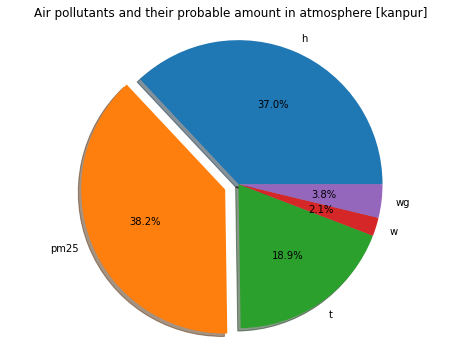

In [17]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere [kanpur]')

plt.axis('equal')
plt.show()


Plotting location on the map using cartopy

# Historical data analysis

dataset : http://aqicn.org/data-platform/register/

Read csv files into a dataframe

In [80]:
import pandas as pd


csv_path = './data.csv'

df = pd.read_csv(csv_path)
df = df
print(df)

           date  pm25  pm10
0      2022/8/1   105      
1      2022/8/2   141      
2      2022/8/3   150      
3      2022/8/4   101      
4      2022/8/5    92      
...         ...   ...   ...
2411  2015/9/15         104
2412  2015/9/16          81
2413  2015/9/17          93
2414  2015/9/18          86
2415  2015/9/19          86

[2416 rows x 3 columns]


In [81]:
df.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

Renaming column names 

In [82]:
df.columns

df= df.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10"
                         })

df.columns

Index(['date', 'pm25', 'pm10'], dtype='object')

In [83]:
df.pm10 = df.pm10.str.replace(" ","")
df.pm10 = df.pm10.replace('', 0)
df['pm10'] = pd.to_numeric(df['pm10'])

In [85]:
df.pm25 = df.pm25.str.replace(" ","")
df.pm25 = df.pm25.replace('', 0)
df['pm25'] = pd.to_numeric(df['pm25'])

In [88]:
df['date'] = pd.to_datetime(df.date)

In [106]:
sorted_date_df = df.sort_values('date')
sorted_date_df

,date,pm25,pm10
2369,2015-07-16,0,62
2370,2015-07-17,0,63
2371,2015-07-18,0,60
2372,2015-07-19,0,60
2373,2015-07-20,0,59
...,...,...,...
14,2022-08-15,90,0
15,2022-08-16,128,0
16,2022-08-17,99,0
17,2022-08-18,94,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2416 non-null   datetime64[ns]
 1   pm25    2416 non-null   int64         
 2   pm10    2416 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 KB


In [96]:
df.pm25 == 0

0       False
1       False
2       False
3       False
4       False
        ...  
2411     True
2412     True
2413     True
2414     True
2415     True
Name: pm25, Length: 2416, dtype: bool

- 0 - 50 = Good                                 | PM 2.5 = 0-12.0
- 51 to 100 = Yellow                            | PM 2.5 = 12.1-35.4
- 101 to 150 = Unhealthy for sensitive group    | PM 2.5 = 35.5-55.4 
- 151 to 200 = Unhealthy                        | PM 2.5 = 55.5-150.4
- 201 to 300 = Very unhealthy                   | PM 2.5 = 150.5-250.4
- 301 to 500 = Hazardous                        | PM 2.5 = 250.5-500.4 

### Get the PM 2.5

In [116]:
pm_df = sorted_date_df[['date', 'pm25']]
pm_df

,date,pm25
2369,2015-07-16,0
2370,2015-07-17,0
2371,2015-07-18,0
2372,2015-07-19,0
2373,2015-07-20,0
...,...,...
14,2022-08-15,90
15,2022-08-16,128
16,2022-08-17,99
17,2022-08-18,94


### Good Category

In [128]:
good_pm25_df = pm_df[pm_df.pm25 <= 12]
good_pm25_df.head(1)

,date,pm25
2369,2015-07-16,0


### Moderate Category

In [136]:
yellow_pm25_df = pm_df.query('pm25 > 12 and pm25 <= 35.4')
yellow_pm25_df.head(1)

,date,pm25
1875,2017-03-15,34


### Unhealthy for Sensitive Group

In [140]:
orange_pm25_df = pm_df.query('pm25 > 35.4 and pm25 <= 55.4')
orange_pm25_df.head(1)

,date,pm25
1955,2016-12-03,48


### Unhealthy

In [148]:
red_pm25_df = pm_df.query('pm25 > 55.4 and pm25 <= 150.4')
red_pm25_df.head(1)

,date,pm25
2256,2015-12-25,69


### Very Unhealthy

In [150]:
purple_pm25_df = pm_df.query('pm25 > 150.4 and pm25 <= 250.4')
purple_pm25_df.head(1)

,date,pm25
2133,2016-05-27,154


### Hazardous

In [153]:
maroon_pm25_df = pm_df.query('pm25 > 250.4 and pm25 <= 500.4')
maroon_pm25_df

,date,pm25


No data on hazardous category 

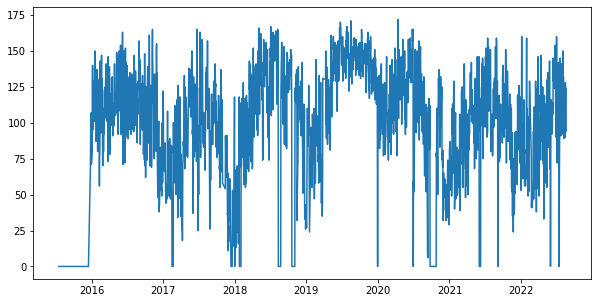

In [190]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(sorted_date_df['date'], sorted_date_df['pm25'])

plt.show()

### Get PM 10

In [154]:
pm10_df = sorted_date_df[['date', 'pm10']]
pm10_df

,date,pm10
2369,2015-07-16,62
2370,2015-07-17,63
2371,2015-07-18,60
2372,2015-07-19,60
2373,2015-07-20,59
...,...,...
14,2022-08-15,0
15,2022-08-16,0
16,2022-08-17,0
17,2022-08-18,0


### Good Category

In [159]:
good_pm10_df = pm10_df[pm10_df.pm10 <= 54]
good_pm10_df.head(1)

,date,pm10
2368,2015-12-15,37


### Moderate Category

In [158]:
moderate_pm10_df = pm10_df.query('pm10 > 54 and pm10 <= 154')
moderate_pm10_df.head(1)

,date,pm10
2369,2015-07-16,62


### Unhealthy for Sensitive Group

In [160]:
orange_pm10_df = pm10_df.query('pm10 > 154 and pm10 <= 254')
orange_pm10_df

,date,pm10
1408,2018-04-06,209
191,2022-01-08,192
199,2022-01-16,250


### Unhealthy

In [ ]:
red_pm10_df = pm10_df.query('pm10 > 254')
red_pm10_df

,date,pm10


No data for Unhealthy category

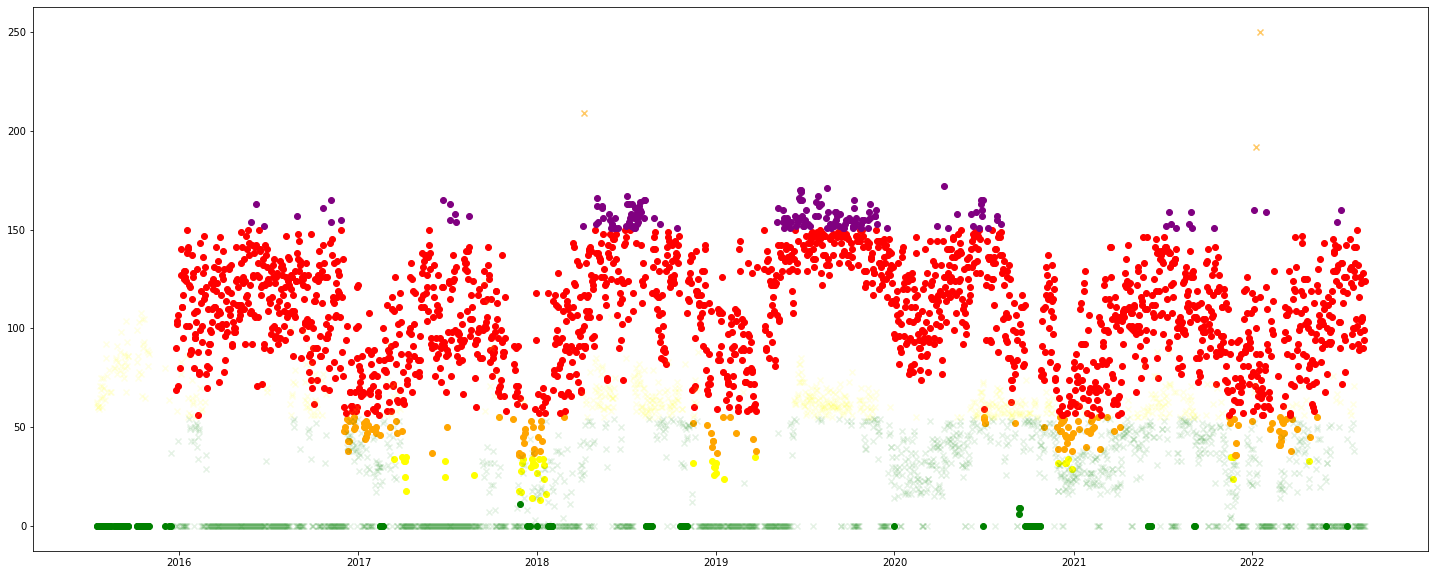

In [177]:
fig, ax = plt.subplots(figsize=(25, 10))

ax.scatter(good_pm25_df['date'], good_pm25_df['pm25'],  c='green')
ax.scatter(yellow_pm25_df['date'], yellow_pm25_df['pm25'], c='yellow')
ax.scatter(orange_pm25_df['date'], orange_pm25_df['pm25'], c='orange')
ax.scatter(red_pm25_df['date'], red_pm25_df['pm25'], c='red')
ax.scatter(purple_pm25_df['date'], purple_pm25_df['pm25'], c='purple')
ax.scatter(good_pm10_df['date'], good_pm10_df['pm10'], c='green', marker="x", alpha=0.1)
ax.scatter(moderate_pm10_df['date'], moderate_pm10_df['pm10'], c='yellow', marker="x", alpha=0.1)
ax.scatter(orange_pm10_df['date'], orange_pm10_df['pm10'], c='orange', marker="x", alpha=0.6)

plt.show()

Extract dates of lockdown

In [178]:
df['date'] = pd.to_datetime(df.date)

df21 = df.loc[df['date'] > '2020-03-24']
df21 = df21.sort_values(by = 'date')
df21

,date,pm25,pm10
896,2020-03-25,102,29
897,2020-03-26,112,31
898,2020-03-27,116,44
899,2020-03-28,152,40
900,2020-03-29,144,42
...,...,...,...
14,2022-08-15,90,0
15,2022-08-16,128,0
16,2022-08-17,99,0
17,2022-08-18,94,0


Plotting the data

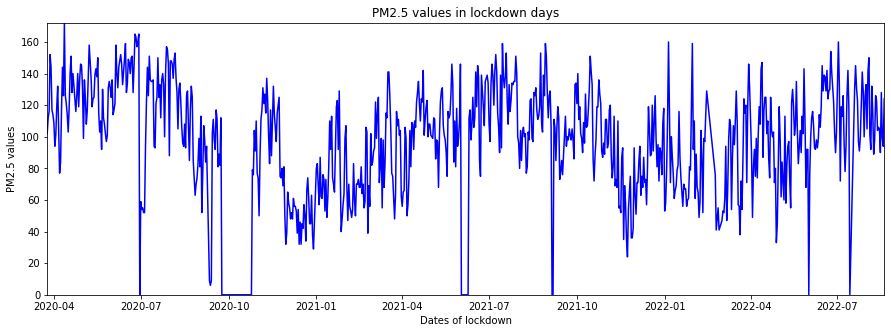

In [184]:
dates = df21['date']
pm25 = df21['pm25']
pm25 = [int(i) for i in pm25]

plt.figure(figsize=(15,5))

length = len(dates)

plt.plot(dates,pm25, c='b')
plt.title('PM2.5 values in lockdown days')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 values')

plt.margins(0)

plt.show()

Extracting past 21 days before lockdown

In [185]:
mask = (df['date'] >= '2020-03-05') & (df['date']  < '2020-03-25')

past21 = df.loc[mask]
past21

,date,pm25,pm10
876,2020-03-05,86,33
877,2020-03-06,103,17
878,2020-03-07,87,0
879,2020-03-08,128,19
880,2020-03-09,78,24
881,2020-03-10,95,24
882,2020-03-11,93,31
883,2020-03-12,108,22
884,2020-03-13,100,53
885,2020-03-14,144,39


Compairing the two

ValueError: x and y must have same first dimension, but have shapes (864,) and (20,)

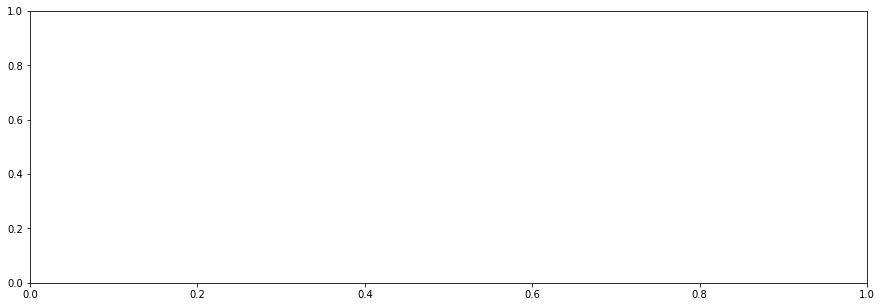

In [188]:
dates = df21['date']

pm25_n = past21['pm25']
pm25_n = [int(i) for i in pm25_n]

plt.figure(figsize=(15,5))

length = [i for i in range(1,len(dates)+1)]

plt.plot(dates, pm25_n, color='red',label='before lockdown')
plt.legend()
plt.title('Comparision of before lockdown vs under lockdown pm2.5 values')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (864,) and (20,)

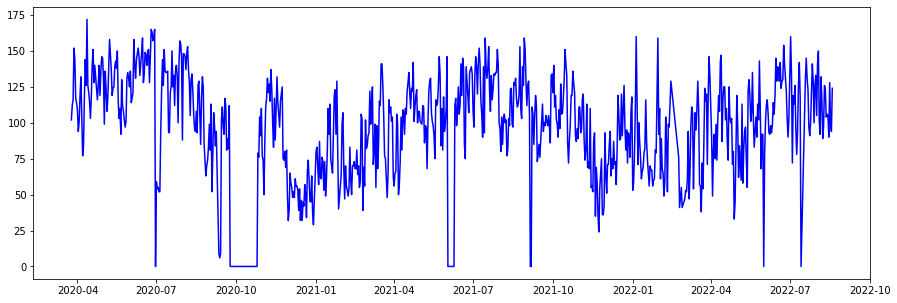

In [189]:
dates = df21['date']
pm25_l = df21['pm25']
pm25_l = [int(i) for i in pm25]


pm25_n = past21['pm25']
pm25_n = [int(i) for i in pm25_n]

plt.figure(figsize=(15,5))

length = [i for i in range(1,len(dates)+1)]

plt.plot(dates, pm25_l, color='blue',label='under lockdown')
plt.plot(dates, pm25_n, color='red',label='before lockdown')
plt.legend()
plt.title('Comparision of before lockdown vs under lockdown pm2.5 values')
plt.show()

Finding solutions to several questions

1> On which date pm2.5 value was minimum in kanpur under lockdown

In [ ]:
df21['pm25'] = [int(i) for i in df21['pm25']]
print(df21[df21.pm25 == df21.pm25.min()]) 

        date  pm25 pm10   o3 no2 so2 co
2 2020-04-03    67    0   28   3   7  0


2> On which date o3 value was maximum in kanpur under lockdown

In [ ]:
df21['o3'] = [int(i) for i in df21['o3']]
print(df21[df21.o3 == df21.o3.max()]) 

         date  pm25 pm10  o3  no2  so2 co
7  2020-04-09    86    0  31    8   11  0
8  2020-04-10   111    0  31   16   10  0
11 2020-04-13   121    0  31   11    9  0


3> What is the average value of so2 in the lockdown 

In [ ]:
df21['so2'] = [int(i) for i in df21['so2']]
avgSo2 = df21['so2'].mean()
print('The average value of so2 :',avgSo2)

The average value of so2 : 7.35
